Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The Iris dataset consists of 150 samples of iris flowers from three species: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features: sepal length, sepal width, petal length, and petal width. These measurements are in centimeters. The goal with this dataset is typically to classify iris flowers into the correct species based on these four feature measurements.

In [3]:
print("Shape of data: ", iris.shape)
print("Missing values: ", iris.isnull().sum().sum())

Shape of data:  (150, 5)
Missing values:  0


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


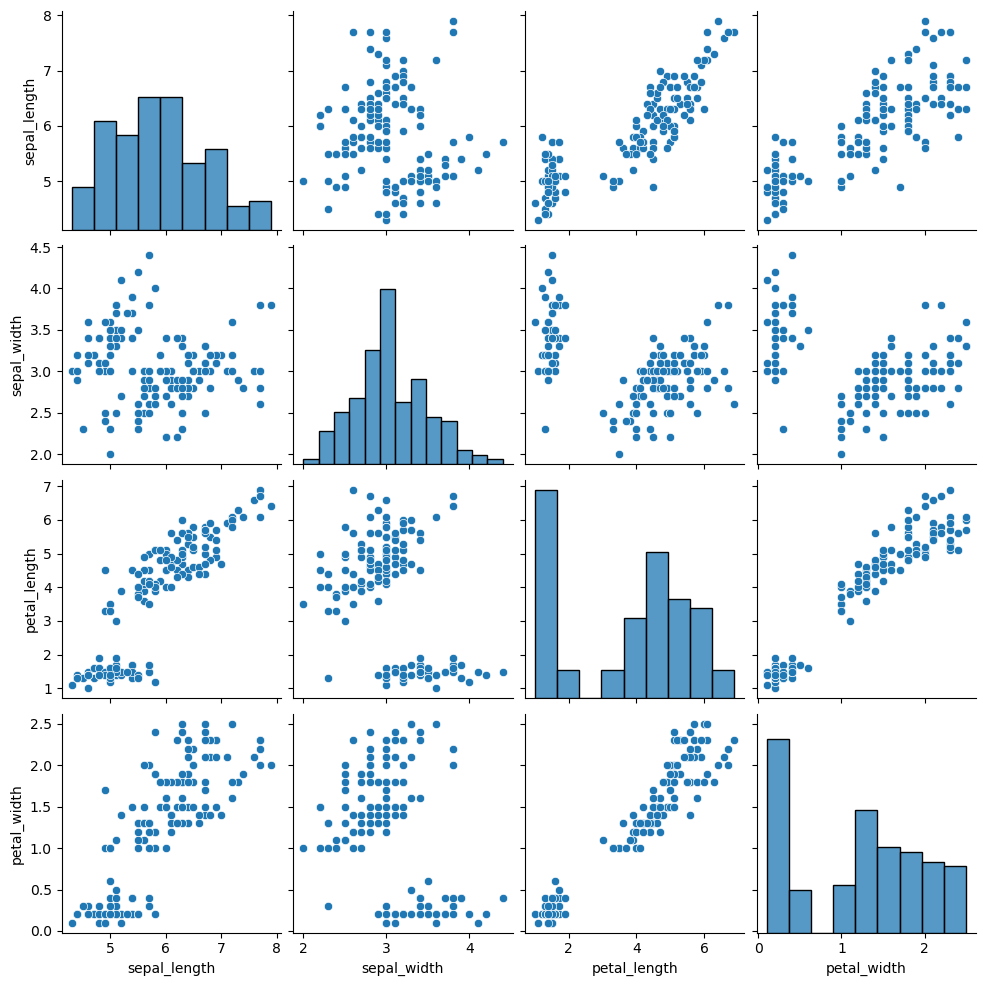

In [5]:
sns.pairplot(iris)

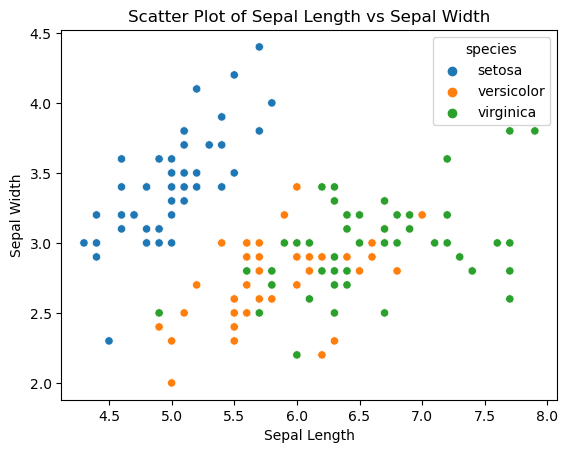

In [6]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris, hue="species")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.show()

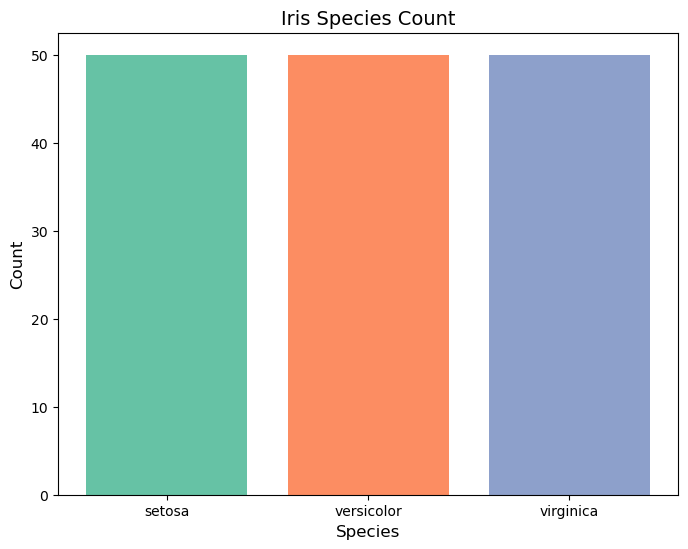

In [7]:
species_count = iris["species"].value_counts()
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set2")
plt.bar(species_count.index, species_count.values, color=colors)

plt.xlabel("Species", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Iris Species Count", fontsize=14)
plt.show()

<Axes: >

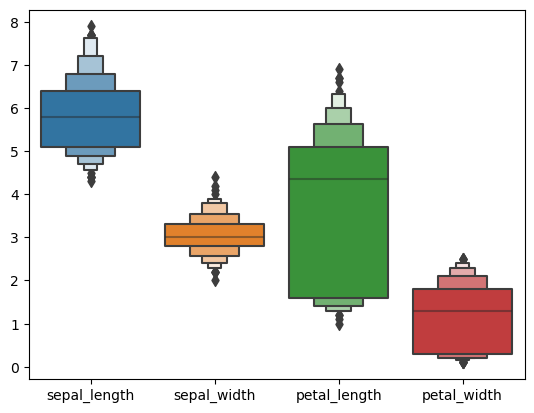

In [8]:
sns.boxenplot(iris)

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])

In [10]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


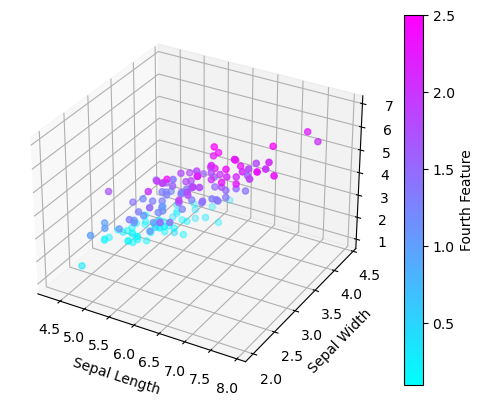

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = iris['sepal_length']
y = iris['sepal_width']
z = iris['petal_length']
fourth_dimension = iris['petal_width']
colormap = plt.colormaps['cool']
sc = ax.scatter(x, y, z, c=fourth_dimension, cmap=colormap)
fig.colorbar(sc, label='Fourth Feature')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
# Splitting the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Independence of Observation

<Axes: >

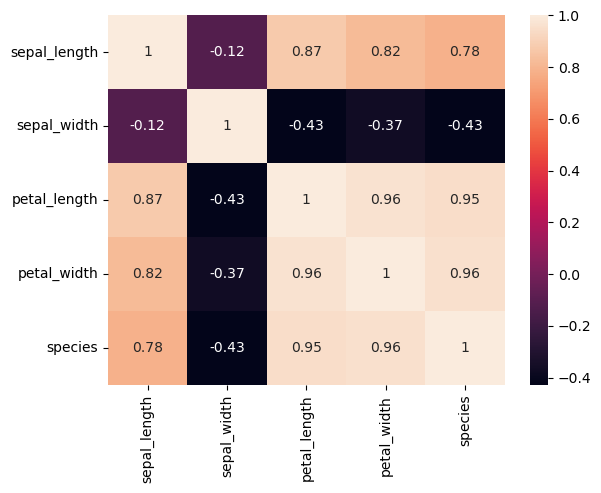

In [13]:
sns.heatmap(iris.corr(), annot = True)

- There are no very strong correlations (close to 1 or -1) between any of the variables. This suggests that there is no direct linear dependence between any two variables. This is a good indication of the independence of observations.

- Based on the provided correlation matrix, there is no strong evidence of dependence or multicollinearity between the variables. This suggests that the independence of observations assumption is likely met for your dataset.

Multicollinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


        Feature         VIF
0  sepal_length  262.969348
1   sepal_width   96.353292
2  petal_length  172.960962
3   petal_width   55.502060


The VIF values suggest that there is multicollinearity among the features. High VIF values, especially those significantly above 10, indicate a strong correlation between predictors, which can negatively impact the stability and interpretation of the model.

- PCA (Principal Component Analysis) and standard scaling (or normalization)

- - Standard scaling ensures that the features have a consistent scale, which is crucial for PCA.
- - PCA reduces the dimensionality of the data by transforming it into a new set of uncorrelated features (principal components).

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris.drop('species', axis=1))  # Exclude the target variable

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaled_data = pd.DataFrame(data=scaled_data, columns=column_names)
input_features = pd.concat([scaled_data, iris['species']], axis=1)

pca = PCA(n_components=4)
pca_data = pca.fit_transform(input_features)


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_names = ['PC1', 'PC2', 'PC3', 'PC4',"species"]
vif = pd.DataFrame()
vif["Feature"] = feature_names
vif["VIF"] = [variance_inflation_factor(input_features.values, i) for i in range(len(feature_names))]
print(vif)

   Feature        VIF
0      PC1   7.080873
1      PC2   2.101161
2      PC3  31.416150
3      PC4  16.294900
4  species   1.592756


High VIF values, such as those for 'PC3' and 'PC4', suggest that these PCA components are correlated with other features in the dataset. This high multicollinearity might make the interpretation of the model more challenging and less stable

- Hence for our prediction, we have opted to utilize tree-based models and support vector machines. Tree-Based Models, including decision trees, random forests, and gradient boosting trees (such as XGBoost and LightGBM), tend to be more resilient to multicollinearity. These models make decisions based on the significance of individual features rather than relying on linear combinations of them.

- Support Vector Machines (SVM) are another excellent choice. They are known to be less influenced by multicollinearity because they aim to identify the hyperplane that maximizes the margin between different classes

In [17]:
# Splitting and Scaling the Data

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Checking class distribution in the training and test sets
print("Training Set Class Distribution:", Counter(y_train))
print("Test Set Class Distribution:", Counter(y_test))

Training Set Class Distribution: Counter({0: 40, 2: 40, 1: 40})
Test Set Class Distribution: Counter({0: 10, 2: 10, 1: 10})


Lets create models

# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled,y_train)

y_predicted = clf.predict(X_test_scaled)
confusion_mat = confusion_matrix(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print("Confusion Matrix:")
print(confusion_mat)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



The accuracy for Decision Tree is good however it's important to be aware of their limitations, especially with respect to overfitting and instability. Pruning techniques or using ensemble methods like Random Forest can help mitigate this.

# Random Forest Classifier

Random Forest, an ensemble learning method, prevents overfitting through two key parameters: the number of trees (n_estimators) and the maximum depth of the trees (max_depth). By aggregating predictions from multiple trees and limiting individual tree depth, it reduces the risk of fitting noise in the data, making it more robust and generalizing well to unseen data.

Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

y_predicted = best_model.predict(X_test_scaled)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt'],
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train_scaled, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)
best_model = random_search.best_estimator_

y_predicted = best_model.predict(X_test_scaled)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 16, 'n_estimators': 191}


Let's take RandomSearch parameters for model building

In [22]:
rd_clf = RandomForestClassifier(max_depth = 56, min_samples_split=2, min_samples_leaf = 3, max_features = "sqrt", n_estimators = 104)
rd_clf.fit(X_train_scaled,y_train)

y_predicted = rd_clf.predict(X_test_scaled)
confusion_mat = confusion_matrix(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print("Confusion Matrix:")
print(confusion_mat)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Learning Curve for Random Forest Classifier

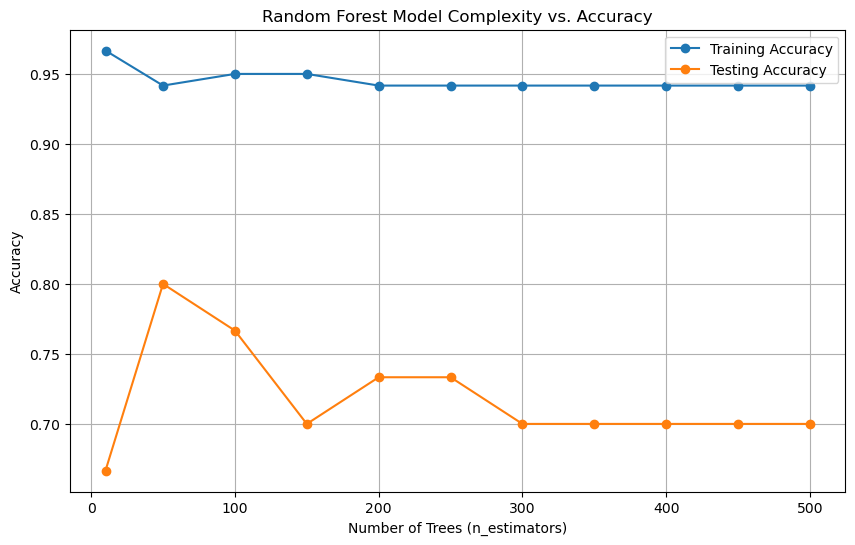

In [23]:
from sklearn.model_selection import cross_val_score

param_range = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
train_scores, test_scores = [], []

# Iterate over the values of the number of trees
for n in param_range:
    rf = RandomForestClassifier(
        max_depth=53,
        min_samples_split=16,
        min_samples_leaf=8,
        max_features="sqrt",
        n_estimators=n,
        random_state=42
    )
    train_score = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy'))
    test_score = np.mean(cross_val_score(rf, X_test_scaled, y_test, cv=5, scoring='accuracy'))

    # Append the scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create a plot to visualize the trade-off
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores, marker='o', label='Training Accuracy')
plt.plot(param_range, test_scores, marker='o', label='Testing Accuracy')
plt.title('Random Forest Model Complexity vs. Accuracy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**exhibiting signs of overfitting**

#k-fold cross-validation

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100)
k = 5
scores = cross_val_score(rf_classifier, X_train, y_train, cv=k, scoring='accuracy')

print(f'Accuracy for each fold: {scores}')
print(f'Mean Accuracy: {scores.mean()}')

Accuracy for each fold: [0.95833333 0.95833333 0.95833333 0.95833333 0.95833333]
Mean Accuracy: 0.9583333333333334


-
A high cross-validation accuracy suggests that the model performs well on the individual cross-validation folds, indicating its ability to generalize across different subsets of the data. However, the learning curve may reveal that the model is overfitting, which implies that it fits the training data exceptionally well but does not generalize effectively to unseen data. In such cases, it's essential to assess and potentially simplify the model.
- The cross-validation accuracy provides information about the model's performance within the training data, while the learning curve helps detect issues related to overfitting and generalization. It's important to strike a balance between these two aspects to create a well-performing and robust model.

Let's simplify our parameters

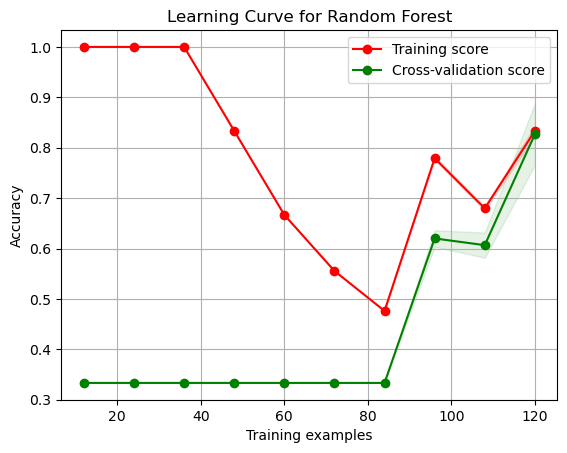

In [26]:
from sklearn.model_selection import learning_curve
rf = RandomForestClassifier(
    max_depth=2,
    min_samples_split=30,
    min_samples_leaf=30,
    max_features="sqrt",
    n_estimators=164,
    random_state=42
)

title = "Learning Curve for Random Forest"
train_sizes, train_scores, test_scores = learning_curve(
    rf,
    X,
    y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

- It looks like the training score is high, indicating that the model is fitting the training data very well. However, the cross-validation score is relatively lower and varies between folds. This suggests that the model might be overfitting the training data.

- Despite simplifying the model by reducing the max_depth or increasing the values for min_samples_split and min_samples_leaf, the model didn't exhibit reduced susceptibility to overfitting. Therefore, it seems that the random forest might not be well-suited for our dataset

# Gradient Boosting Classifier

- Selecting optimal hyperparameters through tuning and subsequently applying them to our gradient boosting model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

gbm = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

best_estimator.fit(X_train_scaled, y_train)
y_predicted = best_estimator.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.9666666666666667


Learning Curve for Gradient Boosting classifier

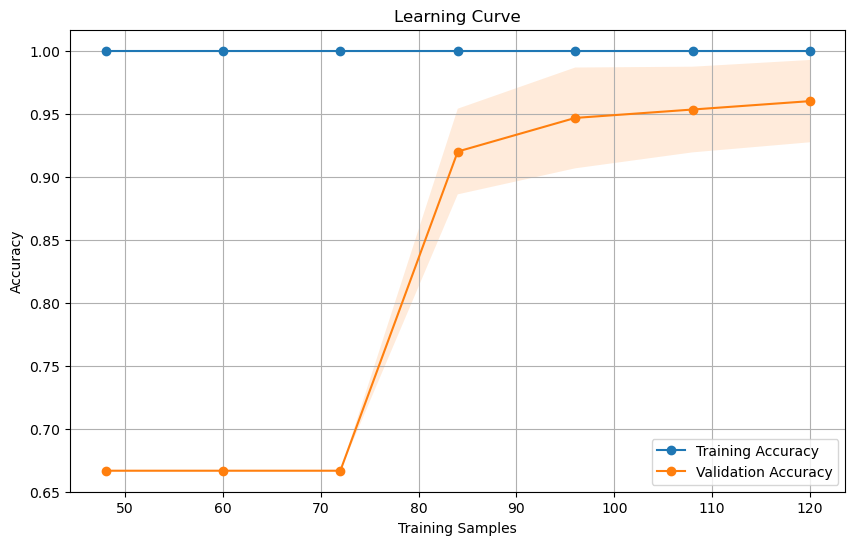

In [28]:
best_gbm = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
train_sizes, train_scores, test_scores = learning_curve(
    best_gbm, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.annotate(f'Best Parameters: {best_gbm.get_params()}', xy=(0.1, 0.85))
plt.annotate(f'Accuracy: 0.967', xy=(0.1, 0.80))

plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Support Vector Classifier

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 1, 10]
}
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
best_svm = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'], gamma=grid_search.best_params_['gamma'])

best_svm.fit(X_train_scaled, y_train)
y_predicted = best_svm.predict(X_test_scaled)
confusion_mat = confusion_matrix(y_test, y_predicted)

accuracy = accuracy_score(y_test, y_predicted)
report = classification_report(y_test, y_predicted)
print("Confusion Matrix:")
print(confusion_mat)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Learning Curve for SVC

[learning_curve] Training set sizes: [ 9 19 28 38 48 57 67 76 86 96]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


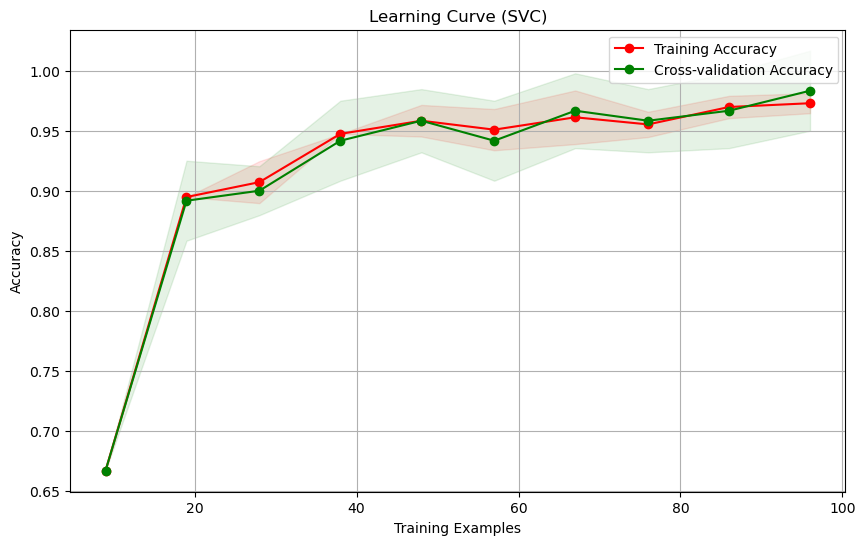

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_scaled_df, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1, verbose=2)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (SVC)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Accuracy")

plt.legend(loc="best")
plt.show()

- It's encouraging to observe that the SVC exhibits a good learning curve and high accuracy after fine-tuning the hyperparameters. This indicates that the optimization of hyperparameters, such as the choice of kernel, regularization strength (C), and the kernel coefficient (gamma), has significantly improved the model's performance.

- SVC works by finding the hyperplane that best separates the different classes in the dataset. Tuning the hyperparameters helps the model determine the optimal hyperplane for accurate classification. So, yes, optimizing these hyperparameters likely played a crucial role in enhancing the SVC's performance.

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_scaled_df, y_train)
y_predicted = logistic_regression_model.predict(X_test_scaled_df)

confusion_mat = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(confusion_mat)
class_report = classification_report(y_test, y_predicted)
print("Classification Report:")
print(class_report)
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy Score: 0.9333333333333333


Learning Curve for logistic Regression

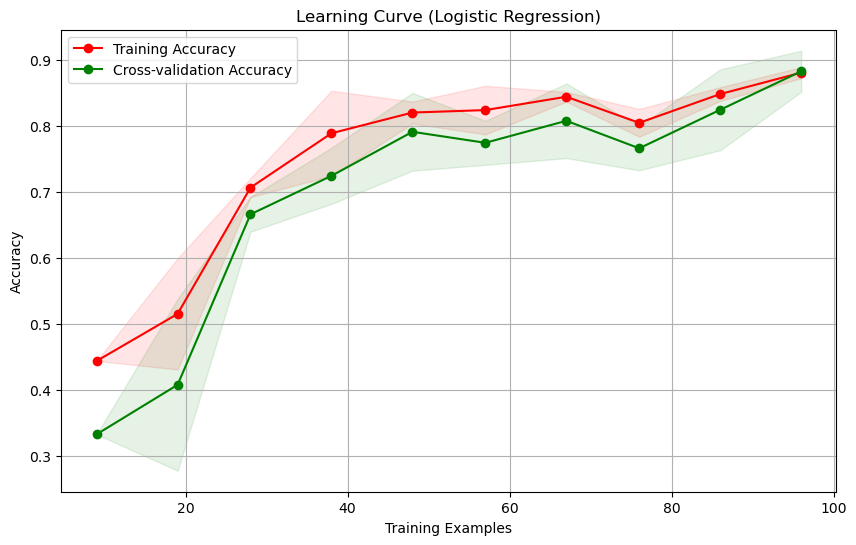

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
logistic_model = LogisticRegression(solver='lbfgs', C=1e-2, max_iter=10000)

train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, X_train_scaled_df, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring=make_scorer(accuracy_score))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Accuracy")

plt.legend(loc="best")
plt.show()

Both Support Vector Classifier (SVC) and Logistic Regression are showing good performance, and the learning curves for both models are similar with relatively high accuracy

**Hence we can achieve accurate predictions in the future using the SVC and logistic regression models,however it is crucial to take into account the factors outlined below, aligning them with the characteristics of your prediction dataset.**

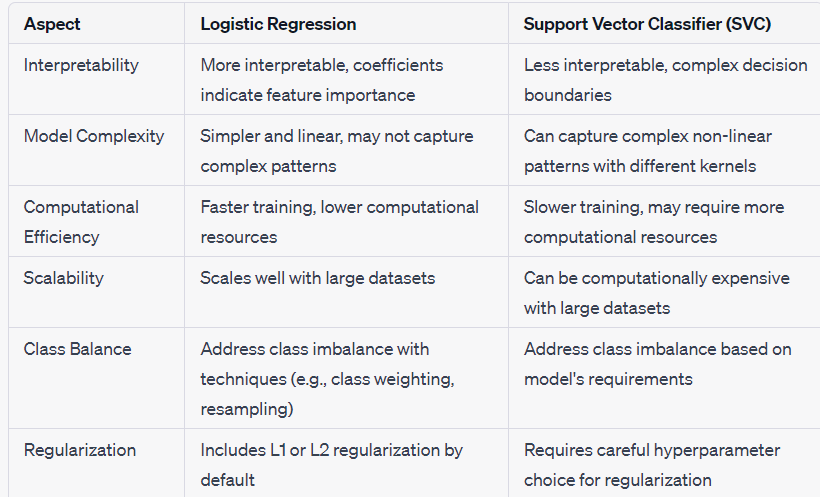

In [34]:
print("Thankyou!")

Thankyou!
